===================================

**Aditya Permana**

**20/466389/PPA/05955**

===================================

Import dataset and split into 70% data train and 30% data test

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

data = pd.read_excel('/content/drive/MyDrive/Semester Genap 2021-2022/Data Science/Tugas/dataset_univ_kmeans.xlsx',index_col = 0)
data["Private"] = data["Private"].replace("Yes",1)
data["Private"] = data["Private"].replace("No",0)
data.head(200)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Evergreen State College,0,1801,1101,438,14,50,3065,363,6297,4600,600,1323,75,78,18.1,14,8355,68
Fairfield University,1,4784,3346,781,30,66,2984,1037,15000,6200,700,1100,86,90,15.1,30,11220,94
Fayetteville State University,0,1455,1064,452,1,16,2632,617,6806,2550,350,766,75,75,15.1,10,6972,24
Ferrum College,1,1339,1107,336,12,36,1051,82,9400,4200,500,1600,53,58,12.5,9,7967,22


Get some initial statistics from both dataset

In [ ]:
print("Dataset statistics")
print(data.describe())
print("\n")


Dataset statistics
          Private          Apps  ...        Expend  Grad.Rate
count  777.000000    777.000000  ...    777.000000  777.00000
mean     0.727156   3001.638353  ...   9660.171171   65.46332
std      0.445708   3870.201484  ...   5221.768440   17.17771
min      0.000000     81.000000  ...   3186.000000   10.00000
25%      0.000000    776.000000  ...   6751.000000   53.00000
50%      1.000000   1558.000000  ...   8377.000000   65.00000
75%      1.000000   3624.000000  ...  10830.000000   78.00000
max      1.000000  48094.000000  ...  56233.000000  118.00000

[8 rows x 18 columns]




Check the N/A value from both dataset

In [ ]:
print("Missing value in train dataset : \n")
print(data.isna().sum())
print("\n")

Missing value in train dataset : 

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64




There is no missing value in Training Dataset and Testing Dataset

Below is the chart of Room.Board with Outstate

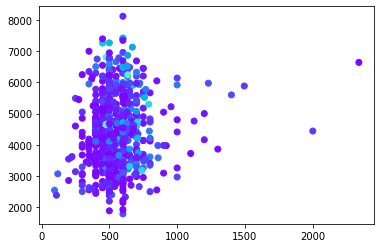

In [ ]:
plt.scatter(data.iloc[:,10],data.iloc[:,9],c=data.iloc[:,1],cmap="rainbow")

Below is the chart of F.Undergrad with Outstate

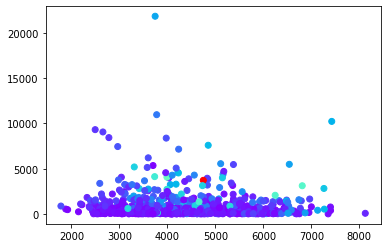

In [ ]:
plt.scatter(data.iloc[:,9],data.iloc[:,7],c=data.iloc[:,1],cmap="rainbow")

Histogram of Out-of-State Tuition based on Private Column

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


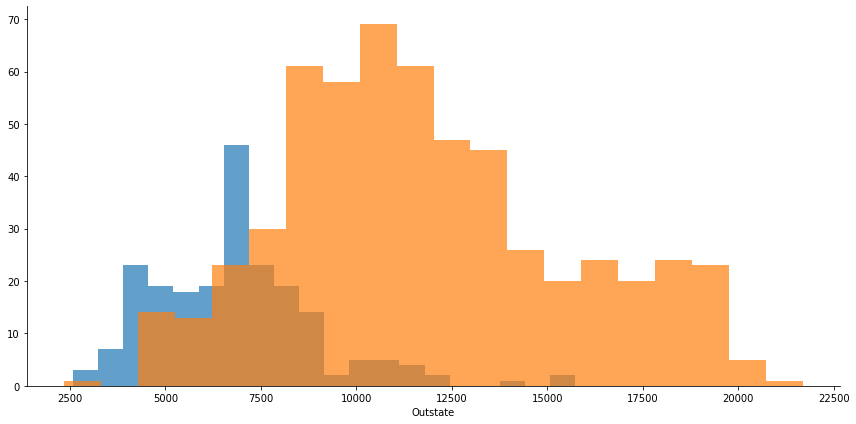

In [ ]:
graph = sns.FacetGrid(data, hue="Private", size=6, aspect=2)
graph = graph.map(plt.hist, "Outstate", bins=20, alpha=0.7)

Histogram of Grad.Rate based on Private Column

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


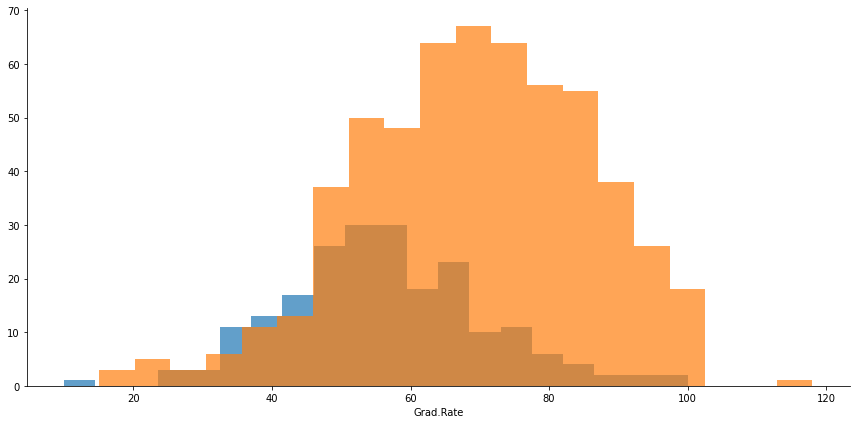

In [ ]:
graph = sns.FacetGrid(data, hue="Private", size=6, aspect=2)
graph = graph.map(plt.hist, "Grad.Rate", bins=20, alpha=0.7)

Get the school that have graduation rate higher than 100%

In [ ]:
data[data["Grad.Rate"]>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Because its not sense, so set the Grad.Rate to 100%

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


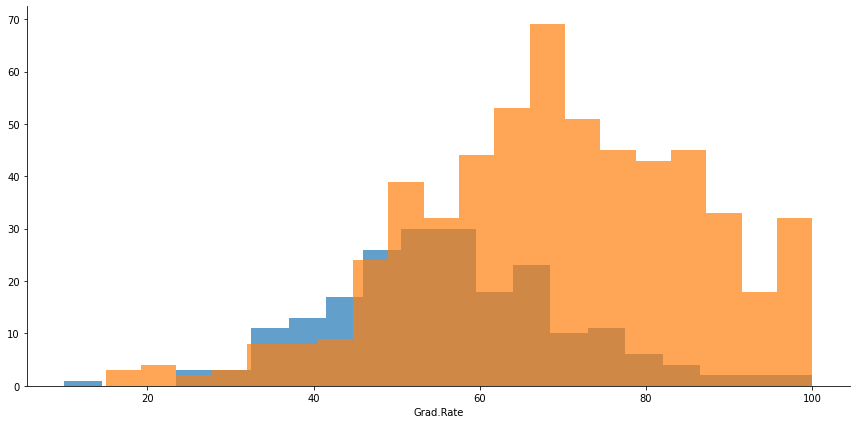

In [ ]:
data.loc[data["Grad.Rate"]>100, "Grad.Rate"] = 100
graph = sns.FacetGrid(data, hue="Private", size=6, aspect=2)
graph = graph.map(plt.hist, "Grad.Rate", bins=20, alpha=0.7)

Create KMeans Cluster using SciKit Learn and fit the model to dataset except for Private column / label

In [ ]:
from sklearn.cluster import KMeans
x = data.iloc[:,[10,9]].values
kmeans = KMeans(n_clusters=2)
kmeans.fit(data.drop("Private",axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Get center of cluster vector

In [ ]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

Evaluation process

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(data["Private"],kmeans.labels_))

[[ 74 138]
 [ 34 531]]


Get classification report

In [ ]:
print(classification_report(data["Private"],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

